# Project4 : Data Wrangling

### Step 1: Gather Data

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json



In [203]:
#importing data

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [204]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response.status_code

200

In [205]:
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

- I don't have developer account in twitter so I downloded the json txt file provided and copied this code to show how the json file was extracted.

In [146]:


import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer


consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


tweet_ids = df_1.tweet_id.values
len(tweet_ids)


count = 0
fails_dict = {}
start = timer()

with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


ModuleNotFoundError: No module named 'tweepy'

In [206]:
#extracting data of interest from the jason file and creat a dataframe for them
tweets_list=[]
ids_list =[]
retweet_count_list = []
favorite_count_list =[]
device_list =[]
with open('tweet-json.txt',encoding = 'utf-8') as json_file:
    for line in json_file:
        tweets_list.append(json.loads(line))  
   
        
    for data in tweets_list:
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        device = data['source'][data['source'].find('rel="nofollow">Twitter for ')+27:-4]
        ids_list.append(str(tweet_id))
        retweet_count_list.append(str(retweet_count))
        favorite_count_list.append(str(favorite_count))
        device_list.append(str(device))


tweets_df = pd.DataFrame({
                            'tweet_id': ids_list,
                          'retweet_count': retweet_count_list,
                          'favorite_count':favorite_count_list,
                          'device':device_list
                        })



In [207]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   object
 2   favorite_count  2354 non-null   object
 3   device          2354 non-null   object
dtypes: object(4)
memory usage: 73.7+ KB


### Step 1: Assess Data

In [208]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   object
 2   favorite_count  2354 non-null   object
 3   device          2354 non-null   object
dtypes: object(4)
memory usage: 73.7+ KB


In [209]:
tweets_df.head()

,tweet_id,retweet_count,favorite_count,device
0,892420643555336193,8853,39467,iPhone
1,892177421306343426,6514,33819,iPhone
2,891815181378084864,4328,25461,iPhone
3,891689557279858688,8964,42908,iPhone
4,891327558926688256,9774,41048,iPhone


In [210]:
tweets_df.tail()

,tweet_id,retweet_count,favorite_count,device
2349,666049248165822465,41,111,iPhone
2350,666044226329800704,147,311,iPhone
2351,666033412701032449,47,128,iPhone
2352,666029285002620928,48,132,iPhone
2353,666020888022790149,532,2535,iPhone


In [211]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [212]:
tweets_df.tweet_id.duplicated().sum()

0

In [213]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2183,668989615043424256,NaN,NaN,2015-11-24 03:08:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bernie. He's taking his Halloween cost...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668989615...,3,10,Bernie,None,None,None,None
1525,690400367696297985,NaN,NaN,2016-01-22 05:07:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Eriq. His friend just reminded him of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690400367...,10,10,Eriq,None,None,None,None
306,836001077879255040,NaN,NaN,2017-02-26 23:52:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas is back and this time he's prettier than...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836001077...,13,10,None,None,None,None,None
502,813081950185472002,NaN,NaN,2016-12-25 18:00:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Baron. He's officially festive as h*ck...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813081950...,11,10,Baron,None,None,None,None
492,813217897535406080,NaN,NaN,2016-12-26 03:00:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is Atlas. He went all out this year. 13/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813217897...,13,10,Atlas,None,None,None,None


In [214]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [215]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [216]:
twitter_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [217]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [218]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1832,836677758902222849,https://pbs.twimg.com/media/C5x57-TWUAEawQh.jpg,2,leopard,0.797410,False,jaguar,0.095487,False,snow_leopard,0.079694,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
257,670778058496974848,https://pbs.twimg.com/media/CU8VFhuVAAAQW8B.jpg,1,pug,0.776612,True,Brabancon_griffon,0.112032,True,boxer,0.039051,True
535,676942428000112642,https://pbs.twimg.com/media/CWT7imQXIAMwpQ2.jpg,1,black-footed_ferret,0.707199,False,polecat,0.154630,False,weasel,0.097626,False
1516,786963064373534720,https://pbs.twimg.com/media/Cuvau3MW8AAxaRv.jpg,1,golden_retriever,0.915303,True,Saluki,0.046213,True,Labrador_retriever,0.037504,True


In [219]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [220]:
image_predictions.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

**Quality:**
- **tweets_df:**
    - retweet and favorate count should be integar.
- **twitter_archive:**
    - tweet_id,in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, and retweeted_status_user_id should be strings
    - timestamp should be in datetime type.
    - nulls in dogs name represented as none
    - nulls is dogs staged represented as none
    - some dogs does not have dog stage(doggo,floofer,ect.) 
    - null data in (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp)
    - wrong rating_numerator value it should be greater than 10
    - wrong rating_denominator value it should be equal to 10
    - expanded urls are from different websites
- **image_predictions**
    - tweet id should be string
    - nulls in some of the columns.

**tidiness:**
- *All tables*
    - merge the three dataframes in one data frame.
    - murging dog stages(doggo,floofer,ect.) in one column in twitter_archive.
    - murge (p1,p2,p3) in one columns in image_prediction.
    - timestamp have extra digits that is not related to time.
    - dogs breed have are in three defirent columns
    - drop columns which we are not intersted in.
    

### Step 3: Clean Data 

In [249]:
# making copy for every data frame
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweets_df_clean = tweets_df.copy()

**Difine**
- change any columns with id to string

**Code**

In [250]:
twitter_archive_clean = twitter_archive_clean.astype({'retweeted_status_id': str , 'retweeted_status_user_id': str,
                                                   'in_reply_to_status_id': str, 'retweeted_status_user_id': str,
                                                   'tweet_id':str,'in_reply_to_user_id':str})
image_predictions_clean = image_predictions_clean.astype({'tweet_id':str})

**Test**

In [251]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   tweet_id                    2356 non-null   object
 1   in_reply_to_status_id       2356 non-null   object
 2   in_reply_to_user_id         2356 non-null   object
 3   timestamp                   2356 non-null   object
 4   source                      2356 non-null   object
 5   text                        2356 non-null   object
 6   retweeted_status_id         2356 non-null   object
 7   retweeted_status_user_id    2356 non-null   object
 8   retweeted_status_timestamp  181 non-null    object
 9   expanded_urls               2297 non-null   object
 10  rating_numerator            2356 non-null   int64 
 11  rating_denominator          2356 non-null   int64 
 12  name                        2356 non-null   object
 13  doggo                       2356 non-null   obje

In [252]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


**Difine**
- Change number of favorate and retweet to int.

**Code**

In [253]:
tweets_df_clean= tweets_df_clean.astype({'retweet_count':int, 'favorite_count':int})

**Test**

In [254]:
tweets_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int32 
 2   favorite_count  2354 non-null   int32 
 3   device          2354 non-null   object
dtypes: int32(2), object(2)
memory usage: 55.3+ KB


**Difine**
- remove the extra zeros after the time and date in timestamp
- changing type to datetime 

**Code**

In [255]:
for _ in range(twitter_archive_clean.timestamp.count()):
    twitter_archive_clean['timestamp'][_] = twitter_archive_clean['timestamp'][_][:-6]

twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

C:\Users\MFHZ2\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**Test**

In [256]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       2356 non-null   object        
 2   in_reply_to_user_id         2356 non-null   object        
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         2356 non-null   object        
 7   retweeted_status_user_id    2356 non-null   object        
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

In [257]:
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1286,708400866336894977,nan,nan,2016-03-11 21:15:02,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",RT if you are as ready for summer as this pup ...,nan,nan,NaN,https://vine.co/v/iHFqnjKVbIQ,12,10,None,None,None,None,None
1717,680191257256136705,nan,nan,2015-12-25 01:00:07,"<a href=""http://twitter.com/download/iphone"" r...",Here's a sleepy Christmas pupper 11/10 https:/...,nan,nan,NaN,https://twitter.com/dog_rates/status/680191257...,11,10,None,None,None,pupper,None
1003,747844099428986880,nan,nan,2016-06-28 17:28:22,"<a href=""http://twitter.com/download/iphone"" r...",This is Huxley. He's pumped for #BarkWeek. Eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/747844099...,11,10,Huxley,None,None,None,None
1081,738885046782832640,nan,nan,2016-06-04 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",This is Charles. He's a Nova Scotian Towel Pou...,nan,nan,NaN,https://twitter.com/dog_rates/status/738885046...,11,10,Charles,None,None,None,None
1036,744971049620602880,nan,nan,2016-06-20 19:11:53,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Indie and Jupiter. They're having...,nan,nan,NaN,https://twitter.com/dog_rates/status/744971049...,12,10,Indie,None,None,None,None


**Difine**
- delete the rows that have rating_numerator less than 10
- delete the rows that have rating_denominator not equal to 10

**Code**

In [258]:
twitter_archive_clean = twitter_archive_clean.query('rating_numerator>=10 and rating_denominator == 10')

**Test**

In [259]:
twitter_archive_clean.describe()

,rating_numerator,rating_denominator
count,1899.000000,1899.0
mean,13.392312,10.0
std,45.381156,0.0
min,10.000000,10.0
25%,11.000000,10.0
50%,12.000000,10.0
75%,12.000000,10.0
max,1776.000000,10.0


**Difine**
- drop unnecessary columns (retweeted_status_id, retweeted_status_user_id, in_reply_to_status_id, retweeted_status_user_id, retweeted_status_timestamp, source, in_reply_to_user_id,expanded_urls) it have a lot of null values and quality ussues

**Code**

In [260]:
twitter_archive_clean = twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id',
                                                   'in_reply_to_status_id', 'retweeted_status_user_id',
                                                   'retweeted_status_timestamp', 'source','in_reply_to_user_id',
                                                   'expanded_urls'],axis =1)

**Test**

In [261]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1899 entries, 0 to 2350
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1899 non-null   object        
 1   timestamp           1899 non-null   datetime64[ns]
 2   text                1899 non-null   object        
 3   rating_numerator    1899 non-null   int64         
 4   rating_denominator  1899 non-null   int64         
 5   name                1899 non-null   object        
 6   doggo               1899 non-null   object        
 7   floofer             1899 non-null   object        
 8   pupper              1899 non-null   object        
 9   puppo               1899 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 163.2+ KB


**Difine**

- creat new column called stage.
- concatenate all dogs stage in one column called 'stage'
- drop old column column and null columns
- replacing Nan with None

**Code**

I have faced many problems fixing this problems but with the help of my instuctor. I got this code from him to fix the problem.

In [262]:
twitter_archive_clean['stage'] = twitter_archive_clean[['doggo','floofer','pupper','puppo']].agg('-'.join, axis =1)
stages = ['doggo','floofer','pupper','puppo']
twitter_archive_clean['stage'] = twitter_archive_clean['stage'].str.extract('('+'|'.join(stages)+')',expand = False)
twitter_archive_clean['stage'] = twitter_archive_clean['stage'].fillna('None')
twitter_archive_clean = twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'],axis = 1)

**Test**

In [263]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1899 entries, 0 to 2350
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1899 non-null   object        
 1   timestamp           1899 non-null   datetime64[ns]
 2   text                1899 non-null   object        
 3   rating_numerator    1899 non-null   int64         
 4   rating_denominator  1899 non-null   int64         
 5   name                1899 non-null   object        
 6   stage               1899 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 118.7+ KB


In [264]:
twitter_archive_clean.sample(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage
802,772193107915964416,2016-09-03 22:02:38,This is Willem. He's a Penn State pupper. Thin...,12,10,Willem,pupper
1229,713761197720473600,2016-03-26 16:15:05,This is Piper. She would really like that tenn...,12,10,Piper,None
1337,705102439679201280,2016-03-02 18:48:16,This is Terrenth. He just stubbed his toe. 10/...,10,10,Terrenth,None
984,749317047558017024,2016-07-02 19:01:20,This is Blu. He's a wild bush Floofer. I wish ...,12,10,Blu,floofer
1425,697943111201378304,2016-02-12 00:39:39,This is Cassie. She goes door to door trying t...,10,10,Cassie,None
1712,680494726643068929,2015-12-25 21:06:00,Here we have uncovered an entire battalion of ...,26,10,None,None
290,838150277551247360,2017-03-04 22:12:52,@markhoppus 182/10,182,10,None,None
741,780496263422808064,2016-09-26 19:56:24,RT @dog_rates: This is Bell. She likes holding...,12,10,Bell,None
2031,671768281401958400,2015-12-01 19:10:13,When you try to recreate the scene from Lady &...,10,10,None,None
428,821149554670182400,2017-01-17 00:18:04,This is Luca. He got caught howling. H*ckin em...,12,10,Luca,None


**Difine**
- drop rows that don't have dog name
- drop rows that don't have a doge stage

**Code**

In [265]:
twitter_archive_clean = twitter_archive_clean.query('name != "None"')
twitter_archive_clean = twitter_archive_clean.query('stage != "None"')

**Test**

In [266]:
twitter_archive_clean.query('name == "None"').count()[0],twitter_archive_clean.query('stage == "None"').count()[0]

(0, 0)

**Define**
- making a columns for dogs breed and confidance for each breed using np.select
- drop all unneeded columns
- drop the rows that don't contain any data

**Code**

I have faced many problems fixing this problems but with the help of my instuctor. I got this code from him to fix the problem.

In [267]:
selection = [(image_predictions_clean['p1_dog'] == True),
            (image_predictions_clean['p2_dog'] == True),
            (image_predictions_clean['p3_dog'] == True)]

breeds = [image_predictions_clean['p1'],
         image_predictions_clean['p2'],
         image_predictions_clean['p3']]

conf = [image_predictions_clean['p1_conf'],
       image_predictions_clean['p2_conf'],
       image_predictions_clean['p3_conf']]

image_predictions_clean['breed'] = np.select(selection,breeds,default = 'none')
image_predictions_clean['confidence'] = np.select(selection,conf,default = '0')

image_predictions_clean = image_predictions_clean.query('breed != "none"')
image_predictions_clean = image_predictions_clean.query('confidence != 0')

image_predictions_clean = image_predictions_clean.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis = 1)

**Test**

In [268]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    1751 non-null   object
 1   jpg_url     1751 non-null   object
 2   img_num     1751 non-null   int64 
 3   breed       1751 non-null   object
 4   confidence  1751 non-null   object
dtypes: int64(1), object(4)
memory usage: 82.1+ KB


In [269]:
image_predictions_clean.sample(10)

,tweet_id,jpg_url,img_num,breed,confidence
767,689275259254616065,https://pbs.twimg.com/media/CZDMMY0WEAAQYjQ.jpg,1,American_Staffordshire_terrier,0.215161
1386,766069199026450432,https://pbs.twimg.com/media/CqGf3xaXYAEh3ak.jpg,1,redbone,0.484855
1846,839239871831150596,https://pbs.twimg.com/media/C6WUNadWYAAPxHv.jpg,3,Leonberg,0.927021
1055,714258258790387713,https://pbs.twimg.com/media/CemOGNjWQAEoN7R.jpg,1,collie,0.176758
239,670435821946826752,https://pbs.twimg.com/media/CU3d0azWUAA38FD.jpg,1,basenji,0.135767
835,694183373896572928,https://pbs.twimg.com/media/CaI8Fn0WAAIrFJN.jpg,1,Pekinese,0.08087000000000001
864,697270446429966336,https://pbs.twimg.com/media/Ca0zxGjW8AEfyYl.jpg,1,toy_poodle,0.880014
384,673343217010679808,https://pbs.twimg.com/media/CVgyFSyU4AA9p1e.jpg,1,Chihuahua,0.541408
465,675006312288268288,https://pbs.twimg.com/media/CV4aqCwWsAIi3OP.jpg,1,boxer,0.654697
141,668567822092664832,https://pbs.twimg.com/media/CUc64knWoAkZt70.jpg,1,Shih-Tzu,0.985649


**Difine**
- making new data frame and join all three tables in that df

**Code**

In [271]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 9 to 2009
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            184 non-null    object        
 1   timestamp           184 non-null    datetime64[ns]
 2   text                184 non-null    object        
 3   rating_numerator    184 non-null    int64         
 4   rating_denominator  184 non-null    int64         
 5   name                184 non-null    object        
 6   stage               184 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 11.5+ KB


In [270]:
twitter_archive_clean['tweet_id'].nunique()

184

In [275]:
df1 = pd.merge(twitter_archive_clean, image_predictions_clean,how = 'inner' ,on='tweet_id')

df = pd.merge(df1, tweets_df_clean,how = 'inner', on='tweet_id')


**Test**

In [276]:
df.sample(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,breed,confidence,retweet_count,favorite_count,device
110,695074328191332352,2016-02-04 02:40:08,This is Lorenzo. He's educated af. Just gradua...,11,10,Lorenzo,pupper,https://pbs.twimg.com/media/CaVmajOWYAA1uNG.jpg,1,Shih-Tzu,0.5101060000000001,1239,3116,iPhone
55,800388270626521089,2016-11-20 17:20:08,This is Doc. He takes time out of every day to...,12,10,Doc,floofer,https://pbs.twimg.com/media/CxuM3oZW8AEhO5z.jpg,2,golden_retriever,0.35986,3265,12456,iPhone
12,871762521631449091,2017-06-05 16:15:56,This is Rover. As part of pupper protocol he h...,12,10,Rover,pupper,https://pbs.twimg.com/media/DBkfY58XcAEdzZy.jpg,2,Labrador_retriever,0.921393,3678,20787,iPhone
43,819004803107983360,2017-01-11 02:15:36,This is Bo. He was a very good First Doggo. 14...,14,10,Bo,doggo,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,42228,95450,iPhone
92,728015554473250816,2016-05-05 00:16:48,This is Rueben. He has reached ultimate pupper...,11,10,Rueben,pupper,https://pbs.twimg.com/media/ChpuRyvVAAARMoq.jpg,1,cocker_spaniel,0.384559,1219,4479,iPhone
117,686618349602762752,2016-01-11 18:39:05,This is Olivia. She just saw an adult wearing ...,11,10,Olivia,pupper,https://pbs.twimg.com/media/CYdbvwjWcAEtjYu.jpg,1,Rottweiler,0.441331,1544,4042,iPhone
52,803773340896923648,2016-11-30 01:31:12,This is Diogi. He fell in the pool as soon as ...,12,10,Diogi,puppo,https://pbs.twimg.com/media/CyeTku-XcAALkBd.jpg,2,miniature_pinscher,0.817066,3220,11203,iPhone
114,689623661272240129,2016-01-20 01:41:08,This is Lucy. She's terrified of the stuffed b...,10,10,Lucy,pupper,https://pbs.twimg.com/media/CZIJD2SWIAMJgNI.jpg,1,toy_poodle,0.279604,748,2467,iPhone
50,811386762094317568,2016-12-21 01:44:13,This is Craig. That's actually a normal sized ...,11,10,Craig,pupper,https://pbs.twimg.com/media/C0Kf9PtWQAEW4sE.jpg,1,Pembroke,0.804177,7444,23302,iPhone
98,711008018775851008,2016-03-19 01:54:56,This is Chuckles. He had a balloon but he acci...,11,10,Chuckles,pupper,https://pbs.twimg.com/media/Cd4CBQFW8AAY3ND.jpg,1,French_bulldog,0.731405,710,3275,iPhone


In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 146
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            147 non-null    object        
 1   timestamp           147 non-null    datetime64[ns]
 2   text                147 non-null    object        
 3   rating_numerator    147 non-null    int64         
 4   rating_denominator  147 non-null    int64         
 5   name                147 non-null    object        
 6   stage               147 non-null    object        
 7   jpg_url             147 non-null    object        
 8   img_num             147 non-null    int64         
 9   breed               147 non-null    object        
 10  confidence          147 non-null    object        
 11  retweet_count       147 non-null    int32         
 12  favorite_count      147 non-null    int32         
 13  device              147 non-null    object        

## Itirate: Asses Data

In [278]:
df.device.unique()

array(['iPhone', 'tter.com/products/tweetdeck" rel="nofollow">TweetDeck'],
      dtype=object)

**quality:**

- devices data is messy not consistance

## Itirate: Clean Data

**difine**

- drop device column

**Code**

In [285]:

df = df.drop('device',axis =1)

KeyError: "['device'] not found in axis"

**Test**

In [286]:
df.isnull().sum()

tweet_id              0
timestamp             0
text                  0
rating_numerator      0
rating_denominator    0
name                  0
stage                 0
jpg_url               0
img_num               0
breed                 0
confidence            0
retweet_count         0
favorite_count        0
dtype: int64

In [287]:
df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,breed,confidence,retweet_count,favorite_count
0,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,7711,32467
1,889531135344209921,2017-07-24 17:02:04,This is Stuart. He's sporting his favorite fan...,13,10,Stuart,puppo,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,2321,15359
2,886366144734445568,2017-07-15 23:25:31,This is Roscoe. Another pupper fallen victim t...,12,10,Roscoe,pupper,https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg,1,French_bulldog,0.999201,3316,21524
3,884162670584377345,2017-07-09 21:29:42,Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,doggo,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1,German_shepherd,0.707046,3128,20771
4,883360690899218434,2017-07-07 16:22:55,Meet Grizzwald. He may be the floofiest floofe...,13,10,Grizzwald,floofer,https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg,1,chow,0.987997,3825,22986


In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 146
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            147 non-null    object        
 1   timestamp           147 non-null    datetime64[ns]
 2   text                147 non-null    object        
 3   rating_numerator    147 non-null    int64         
 4   rating_denominator  147 non-null    int64         
 5   name                147 non-null    object        
 6   stage               147 non-null    object        
 7   jpg_url             147 non-null    object        
 8   img_num             147 non-null    int64         
 9   breed               147 non-null    object        
 10  confidence          147 non-null    object        
 11  retweet_count       147 non-null    int32         
 12  favorite_count      147 non-null    int32         
dtypes: datetime64[ns](1), int32(2), int64(3), object(7

**Difine**
- save df to a csv file called (twitter_archive_master.csv)

**Code**

In [289]:
df.to_csv('twitter_archive_master.csv')

**Test**

In [327]:
master_df = pd.read_csv('twitter_archive_master.csv')
master_df.head()

,Unnamed: 0,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,breed,confidence,retweet_count,favorite_count
0,0,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,7711,32467
1,1,889531135344209921,2017-07-24 17:02:04,This is Stuart. He's sporting his favorite fan...,13,10,Stuart,puppo,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,2321,15359
2,2,886366144734445568,2017-07-15 23:25:31,This is Roscoe. Another pupper fallen victim t...,12,10,Roscoe,pupper,https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg,1,French_bulldog,0.999201,3316,21524
3,3,884162670584377345,2017-07-09 21:29:42,Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,doggo,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1,German_shepherd,0.707046,3128,20771
4,4,883360690899218434,2017-07-07 16:22:55,Meet Grizzwald. He may be the floofiest floofe...,13,10,Grizzwald,floofer,https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg,1,chow,0.987997,3825,22986


## Visualisation and insight

### 1- Favorite count for each stage

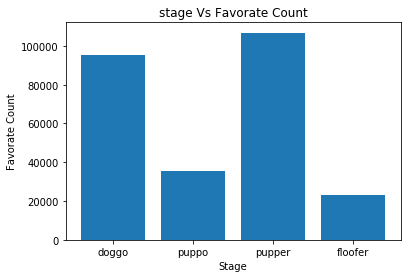

In [328]:
x = master_df['stage']
y = master_df['favorite_count']

plt.bar(x,y)
plt.title('stage Vs Favorate Count')
plt.xlabel('Stage')
plt.ylabel('Favorate Count');

we can see in this bar chart that the puppers get more likes than other dog stages

### 2- Correlation betwwen retweet count and favorite count

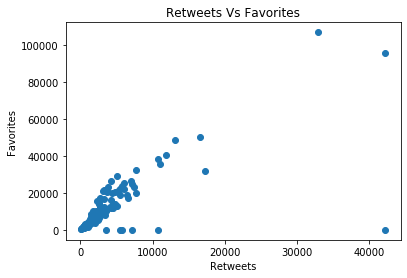

In [329]:
retweets = master_df['retweet_count']
favorites = master_df['favorite_count']

plt.scatter(retweets,favorites)
plt.title('Retweets Vs Favorites')
plt.xlabel('Retweets')
plt.ylabel('Favorites');

In this scatter we want to check if there are any corrlation between the number of likes and we can see in most of the data points when retweets increase the likes increase also.

### 3- Average rating for each stage

In [331]:
master_df.groupby('stage').rating_numerator.mean()

stage
doggo      12.350000
floofer    11.600000
pupper     11.229885
puppo      12.000000
Name: rating_numerator, dtype: float64

the doggo get the highest rating on average.

### 4- Count of dogs by stage


In [343]:
master_df.groupby('stage').count()['tweet_id']

stage
doggo      40
floofer     5
pupper     87
puppo      15
Name: tweet_id, dtype: int64

most of the dogs are (Puppo) which make shows why they have got most of the likes.